In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst data
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

## Customizing our chart from 12_Exercise_Trending_Skills.ipynb

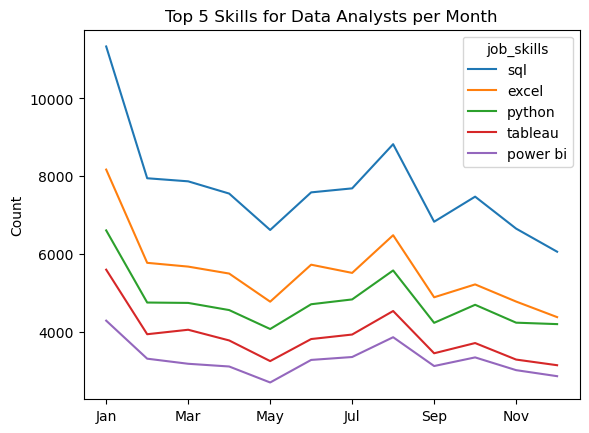

In [3]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
# create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_DA_explode= df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

# sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

# Get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [4]:
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


### Basic Customizations
#### Line Styles and Colors
##### Line Style
- linestyle: Change the line style
##### Line Color
- color: Change the line color
- colormap: Change the color sheme for all data points
##### Line Width
- linewidth: Change the line width
#### Markers
##### Marker Style
- marker: Change the marker style
##### Marker Size
- markersize: Change the marker size

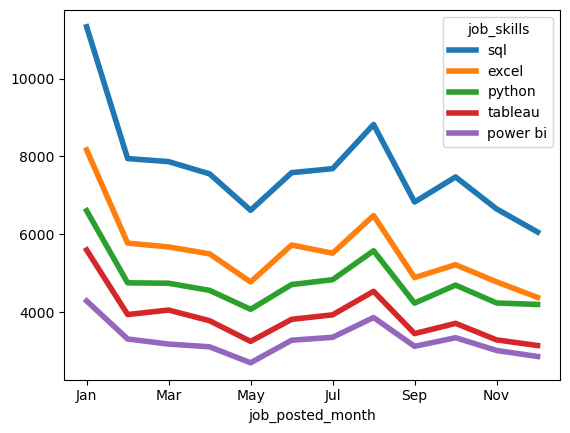

In [6]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4

)

plt.show()

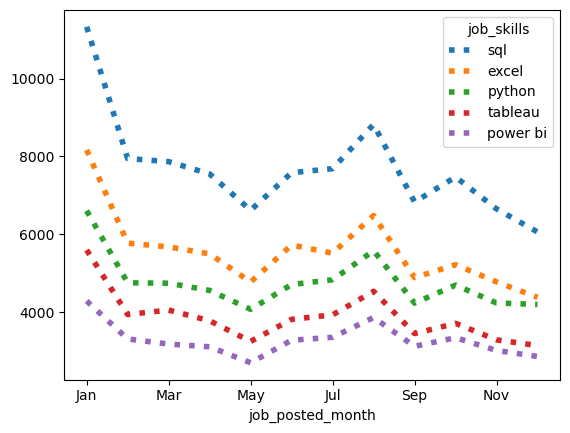

In [8]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', # options: '-', '--', '-.', ':'

)

plt.show()

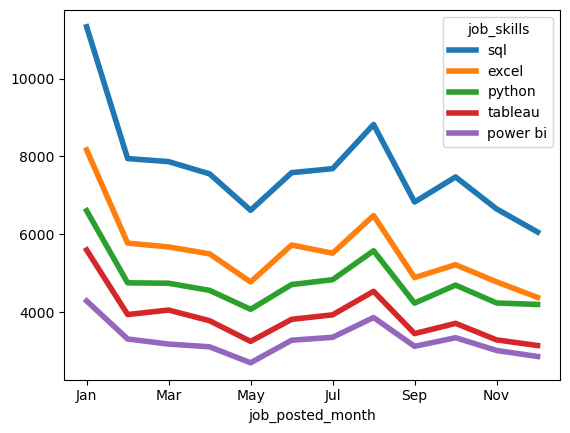

In [9]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle='-', # options: '-', '--', '-.', ':'

)

plt.show()

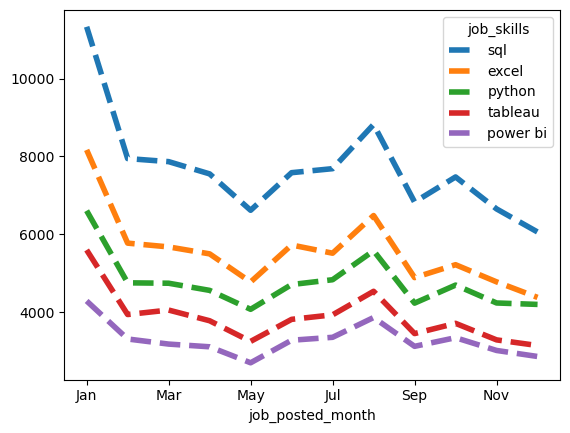

In [10]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle='--', # options: '-', '--', '-.', ':'

)

plt.show()

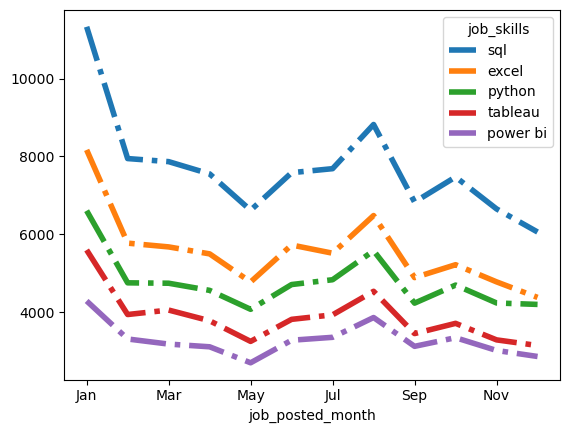

In [11]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle='-.', # options: '-', '--', '-.', ':'

)

plt.show()

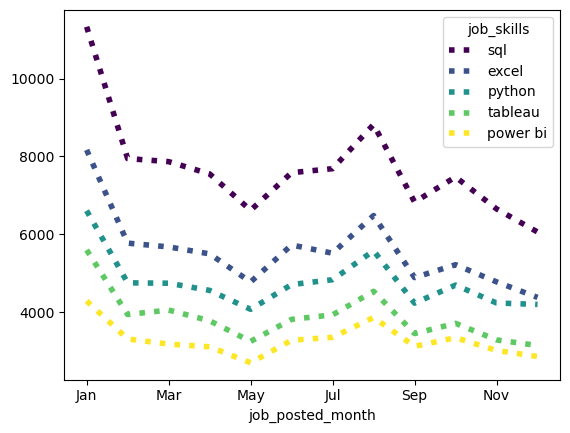

In [12]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', # options: '-', '--', '-.', ':'
    colormap='viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis' 

)

plt.show()

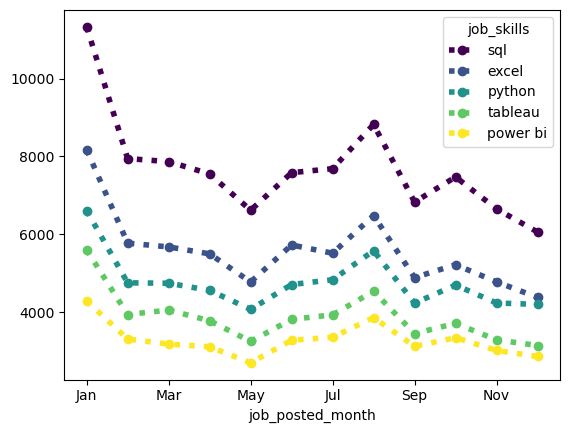

In [13]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', # options: '-', '--', '-.', ':'
    colormap='viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
    marker='o', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...

)

plt.show()

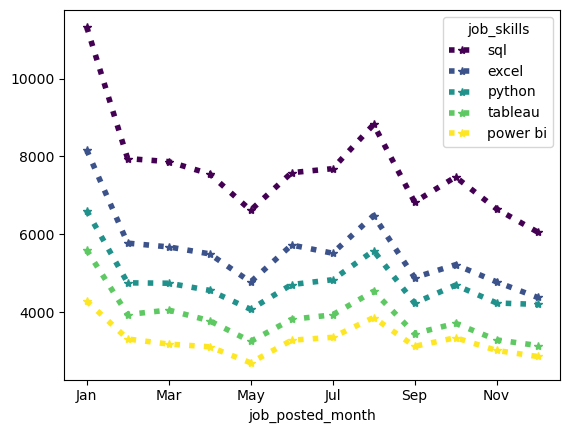

In [14]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', # options: '-', '--', '-.', ':'
    colormap='viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
    marker='*', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...

)

plt.show()

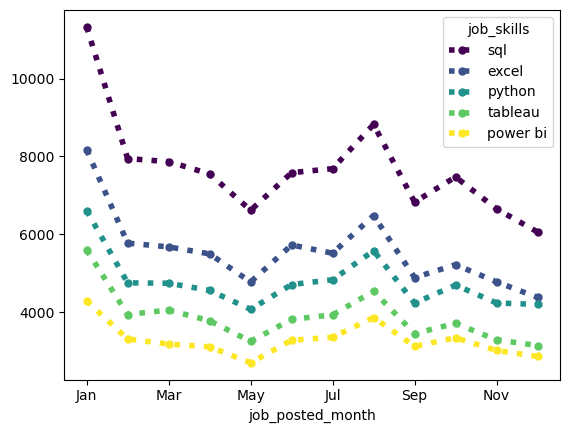

In [15]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', # options: '-', '--', '-.', ':'
    colormap='viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
    marker='o', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    markersize=5,

)

plt.show()

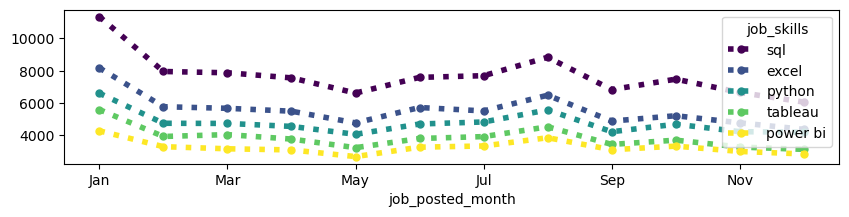

In [16]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', # options: '-', '--', '-.', ':'
    colormap='viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
    marker='o', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    markersize=5,
    figsize=(10, 2)

)

plt.show()

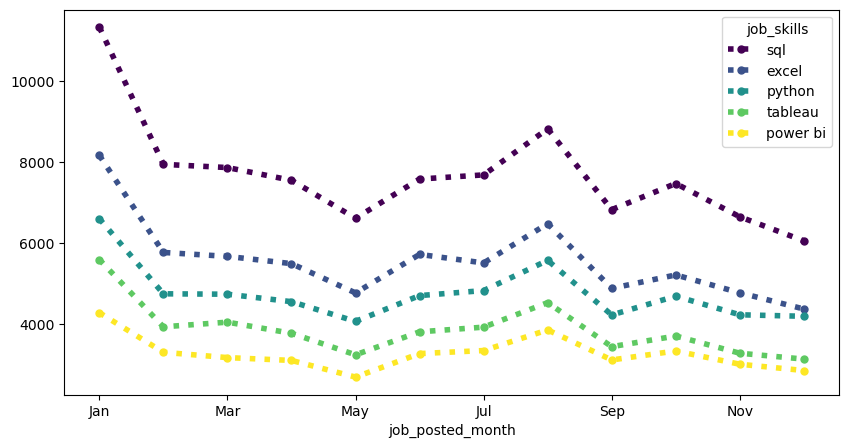

In [17]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', # options: '-', '--', '-.', ':'
    colormap='viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
    marker='o', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    markersize=5,
    figsize=(10, 5)

)

plt.show()

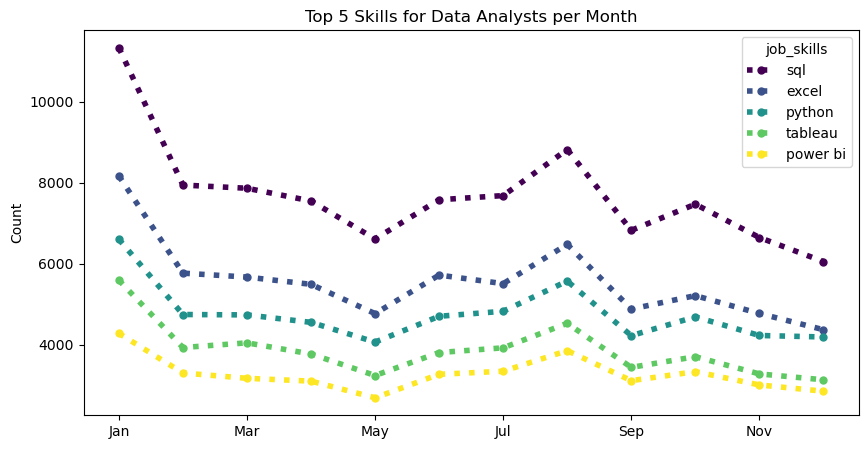

In [18]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', # options: '-', '--', '-.', ':'
    colormap='viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
    marker='o', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    markersize=5,
    figsize=(10, 5)

)

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

#### Set Axis Limits
##### Set X Limit
- xlim: Set the x-axis view limits
##### Set Y Limit
- ylim: Set the y-axis view limits
#### Grid
##### Add Grid
- grid: Add a grid to the plot

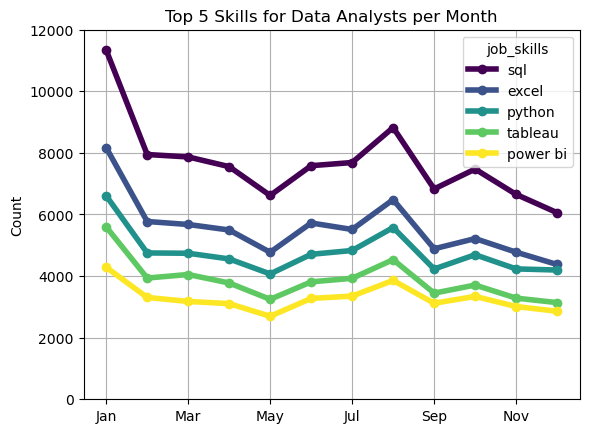

In [19]:
#Course Notes:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle='-', # options: '-', '--', '-.', ':'
    colormap='viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis' 
    markersize=6,
    marker='o', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    # figsize=(10, 5)
)

plt.grid(True)

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylim(0, 12000)
plt.ylabel('Count')
plt.xlabel('')
plt.show()

## Customizing our Scatter plot from 15_Scatter_Plot.ipynb

## import adjust_text

In [20]:
# Explode the 'job_skills' into individual rows
df_exploded = df_DA.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


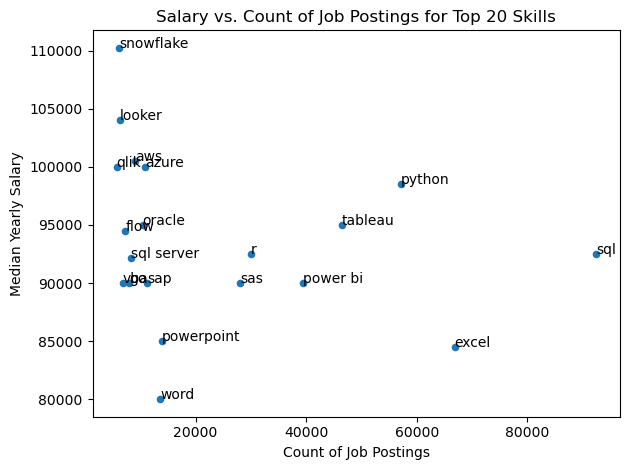

In [21]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

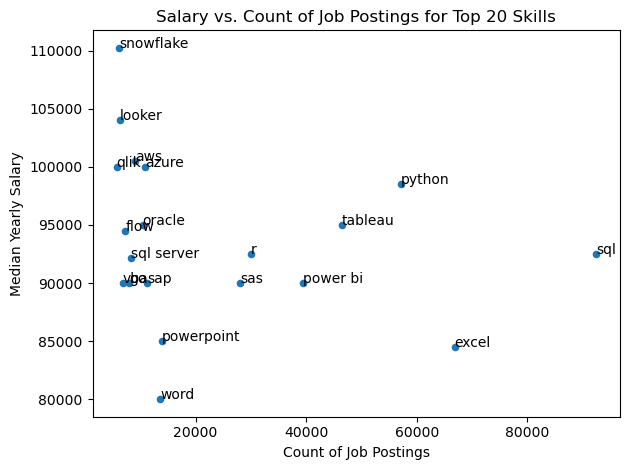

In [27]:
#adjust_text is gray because it needs to be added below
from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

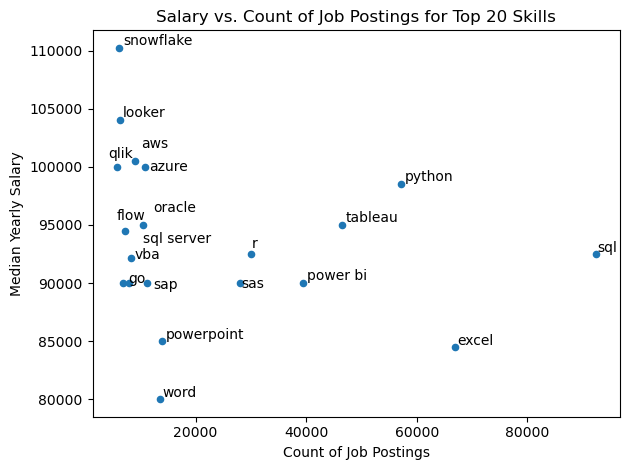

In [29]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

# Prepare texts for adjustText
#This list is a list of all these different plt.text calls that has basically the x value, the y value, and what we want for the text
    #This:plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
#So we need to insert this or append this into texts
#So i'm going to call out texts.appends and wrapp the whole thing in ()
    #Like this: texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

#adjust_text needs to be below where we are actually generating the twxt
#1st arguments we will be providing to it will be the first argument of texts, which is a list, so we will just call it what it is, texts
    #texts is not actually define yet, so we need to create a list to do this
adjust_text(texts)


plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

Results were not bad. There is no longer any overlap, but it is still a little hard to read certain points. For example, which one is oracle, which one is sql_server, and which one is flow? We need some arrows.

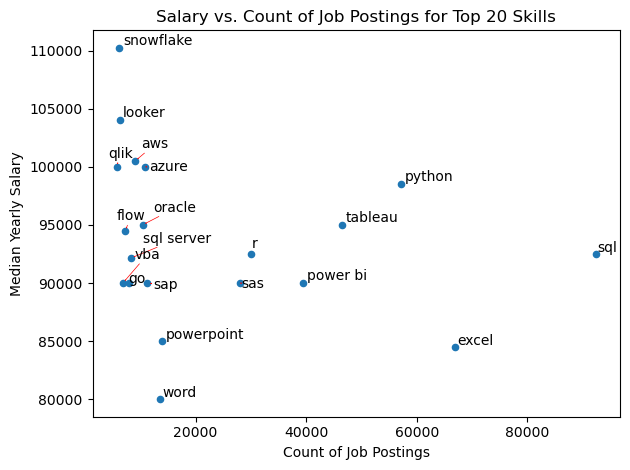

In [30]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))


plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

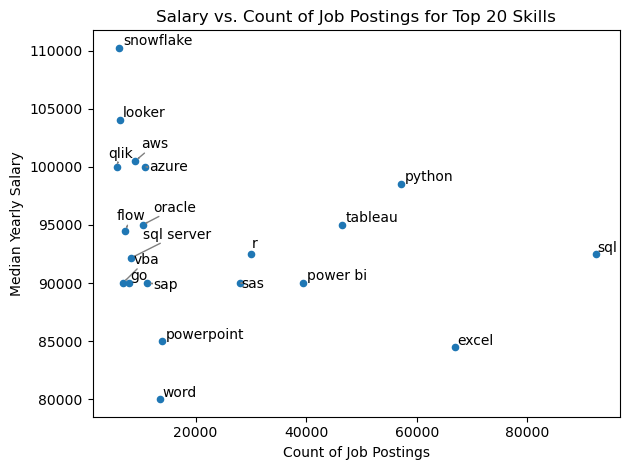

In [31]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))


plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

### Set Major Formatter
#### Notes
- set_major_formatter(): Set the formatter for the major ticker of the default or specified axis.
- Common arguments:
    - formatter: The formatter object used for major ticks. Can be from matplotlib.ticker.

Example
For our example let's use set_major_formatter to re-format the y-axis. So the 1000s show up as $1k for instance.

How does this work?

ax.yaxis.set_major_formatter(): Assigns a custom formatter to the major tick labels on the y-axis.
plt.FuncFormatter(): Initializes a formatter that uses a user-defined function to format tick labels.
lambda y, _: An anonymous function that takes two parameters: y (the tick value) and _ (a placeholder for the position, not used here).
f'${int(y/1000)}K': Formats the tick value y into thousands, appending 'K' and a dollar sign to indicate currency, enhancing readability for large numbers.

### Get Current Axes
#### Get Current Axes
##### Get Both Axes
- gca(): Get the current axes.
- Returns the current axes matplotlib.axes.Axes instance of the current figure.
##### Get X Axis
- get_xaxis(): Get the x-axis instance.
- Returns the matplotlib.axis.XAxis object for the current axes, enabling further customization of the x-axis.
##### Get Y Axis
- get_yaxis(): Get the y-axis instance.
- Returns the matplotlib.axis.YAxis object for the current axes, allowing further customization of the y-axis.

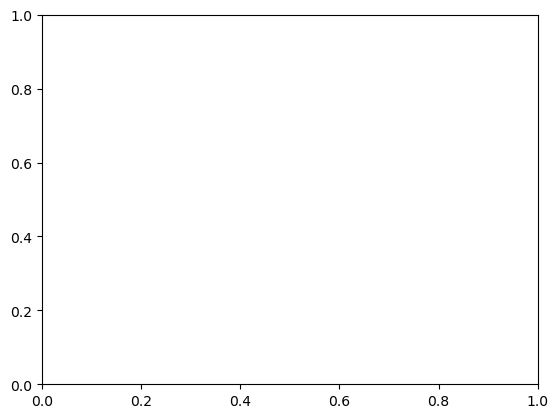

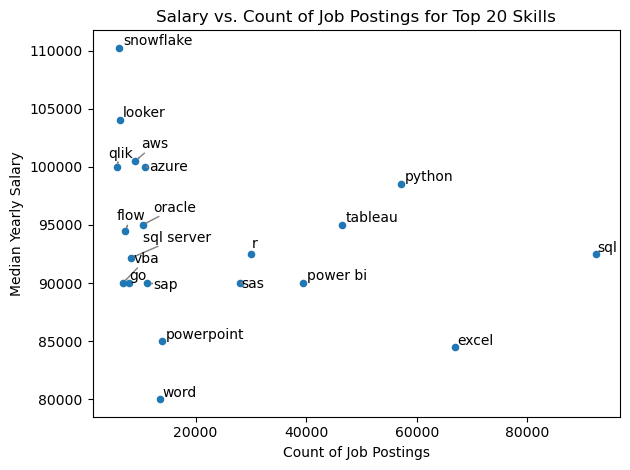

In [36]:
#Lastly, we want to format the y-axis
    #From this 110000 to this $110k
#To do this, we will use the class of FuncFormatter(func)

#We are not modifying the figures, we are modifying the axis, so we need to access to axis element.
#We can do this one of two ways:
    # fig, ax = plt.subplots()
    # ax = plt.gca()

fig, ax = plt.subplots()

from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')


texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

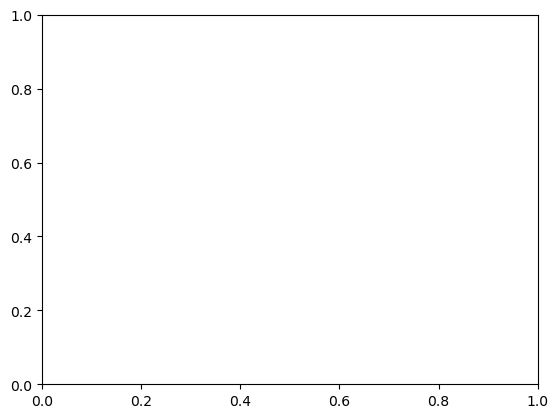

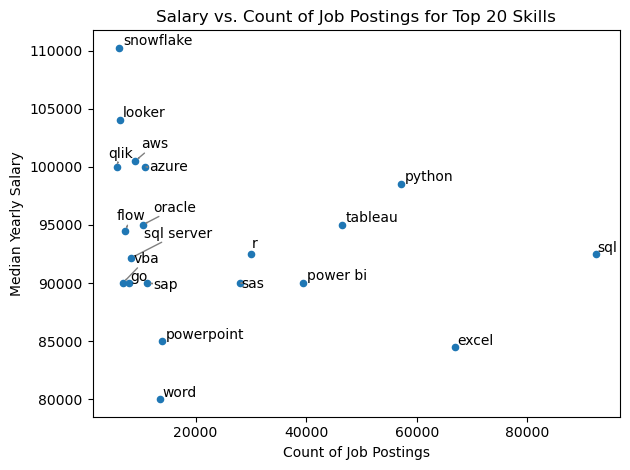

In [37]:
#Lastly, we want to format the y-axis
    #From this 110000 to this $110k
#To do this, we will use the class of FuncFormatter(func)

#We are not modifying the figures, we are modifying the axis, so we need to access to axis element.
#We can do this one of two ways:
    # fig, ax = plt.subplots()
    # ax = plt.gca()

ax = plt.gca()

from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')


texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))


plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

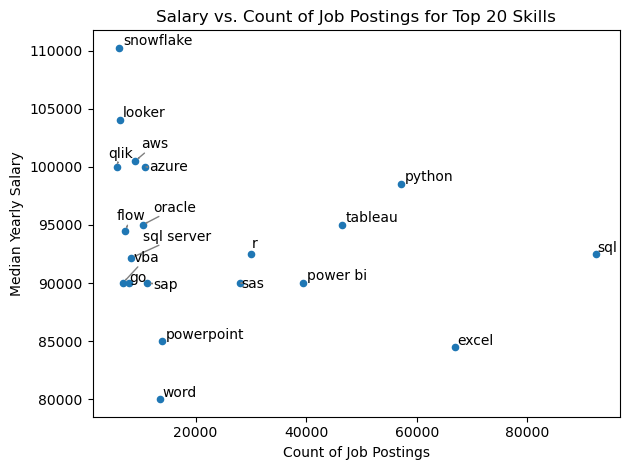

In [39]:
#Potential problem with ax = plt.gca()
#Luke's scatter plot disappeared
#We actually have to call this of getting access after we actually generated the plot
#After running it likt this, he got all his values back
# I didn;t lose my scatter plot, but this is something to keep in mind 
from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')


texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

ax = plt.gca()

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

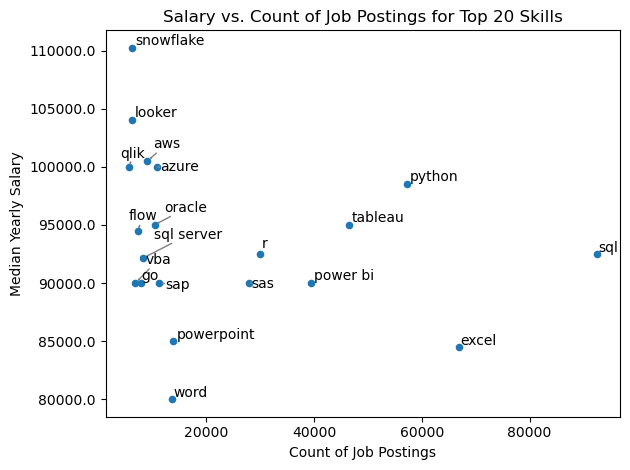

In [40]:
#We want the y-axis of this axis object
#So we specify ax.yaxis and then, we are foing to call the method of set_major_formatter()
#This is were we argoing to put in that plt.FuncFormatter()
from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')


texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: y))  # Example formatting y-axis
#inside plt.FuncFormatter(), we need to pass a function, specifically, it's going to be a lambda function
#with lambda function, we get 2 values: y and pos (or position)
#For the time being, we are only going to print back out the y that it provides

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

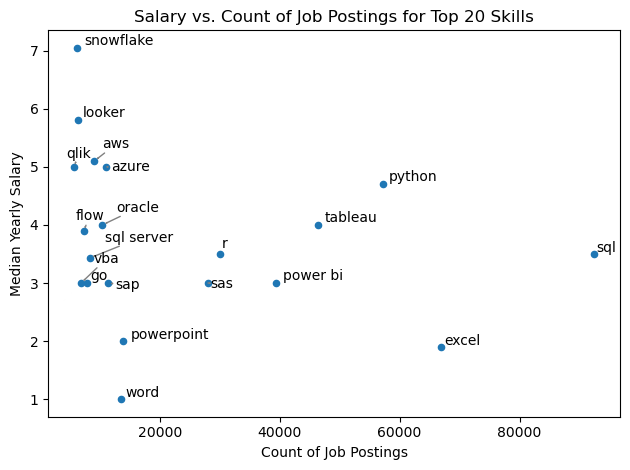

In [41]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')


texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: pos))  
#Alternatively, if we wanted to see the postion (just to understand what it is), it returns the index value of each of the tick marks 

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

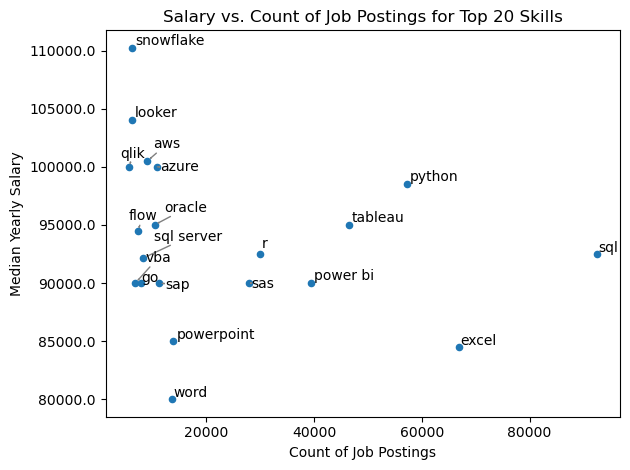

In [42]:
#We have our y value, now, we have to format it
#The easiest way to do this is passinf it in via an f string
from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')


texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y}'))  


plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

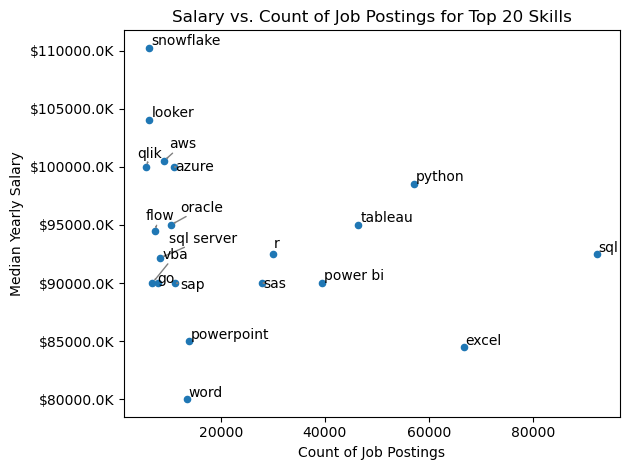

In [45]:
#Getting the $ and K

from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')


texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${y}K'))  


plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

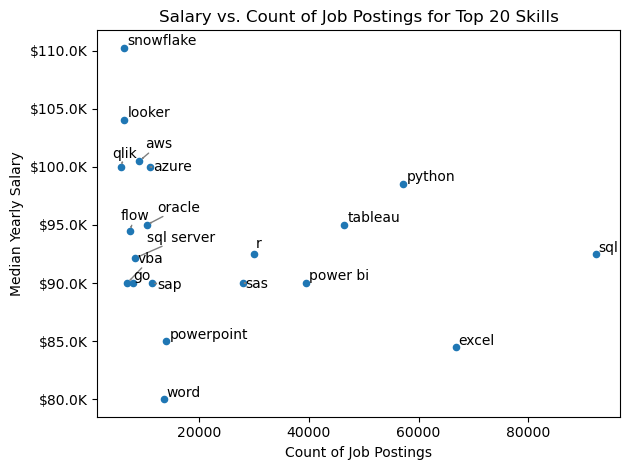

In [46]:
#To reduce the decimal places, divide by 1000

from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')


texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${y/1000}K'))  


plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

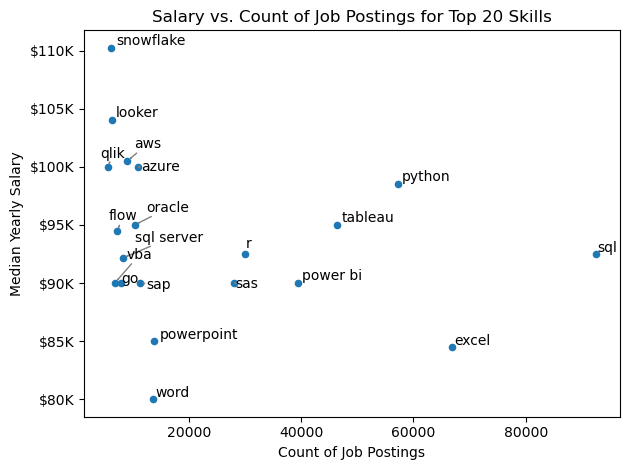

In [47]:
#To get rid of the .0, covert to an int

from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')


texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  


plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

___

## Course Practice Problems

Create a line plot showing the trend of job postings over the months for Cloud Engineer job postings:

- Create a new DataFrame called df_ce that filters only job postings that are 'Cloud Engineer'
- Customize the plot by setting the line style to dotted, the line color to purple, and the marker style to 'o'.
- Add a title 'Job Postings Trend for Cloud Engineers' and label the y-axis as 'Count of Job Postings'.

(2.16.1) 

U   se the DataFrames plot() method to create the line plot and customize the line style, color, and marker style using the linestyle, color, and marker parameters.

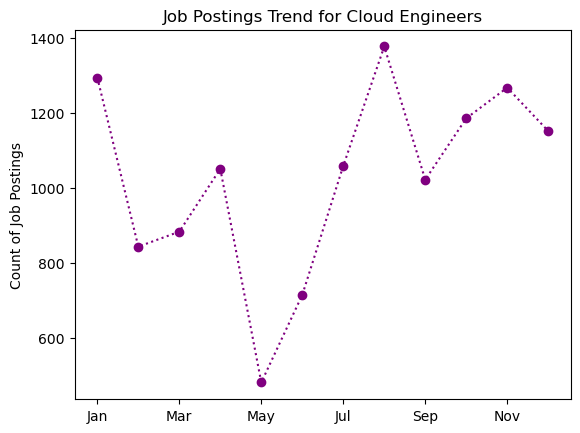

In [70]:
df_ce = df[df['job_title_short'] == 'Cloud Engineer'].copy()
df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.month.apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_ce_pivot = df_ce.pivot_table(index='job_posted_month',  aggfunc='size') #OR df_ce.groupby('job_posted_month_no')['job_title_short'].size()
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_ce_pivot = df_ce_pivot.reindex(months_order, fill_value=0)
df_ce_pivot.plot(kind='line',
                 linestyle= ':',
                 color= 'purple',
                 marker= 'o'
                 )

plt.title('Job Postings Trend for Cloud Engineers')
plt.ylabel('Count of Job Postings')
plt.xlabel('')
plt.show()


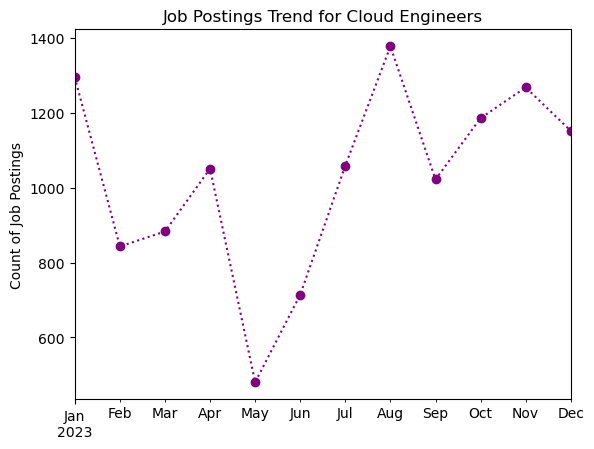

In [71]:
#Course Solution:

df_ce = df[df['job_title_short'] == 'Cloud Engineer'].copy()
df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.to_period('M')
monthly_job_postings = df_ce.groupby('job_posted_month').size()

monthly_job_postings.plot(
 kind='line', 
 linestyle=':', 
 color='purple', 
 marker='o'
 )
plt.title('Job Postings Trend for Cloud Engineers')
plt.ylabel('Count of Job Postings')
plt.xlabel('')
plt.show()

Create a bar chart showing the top 5 job companies hiring for Senior Data Analyst roles:

- Create a DataFrame called SDA_df. 
- Customize the plot by setting the bar colors to 5 different colors with the variable colors.
- Add a grid to the y-axis only and making it dashes.
- Rotate the x-axis labels by 45 degrees.
- Label the y-axis as 'Number of Job Postings' and set the title to 'Top 5 Companies hiring Senior Data Analysts by Number of Postings'; Make the font size 14.

Code Needed
colors = ['blue', 'orange', 'green', 'red', 'purple']

(2.16.2)

    Use DataFrame method plot() to create the bar chart specifying the color paramater. Customize the grid using the plt.grid() function specifying the parameters of axis of 'y' and linestyle of '--'.

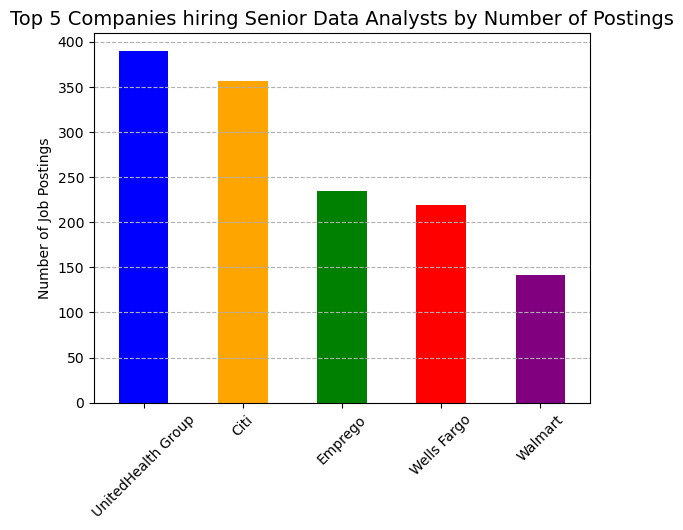

In [87]:
SDA_df = df[df['job_title_short'] == 'Senior Data Analyst']
top_5_companies = SDA_df.groupby('company_name')['job_title_short'].size().sort_values(ascending=False).head()

colors = ['blue', 'orange', 'green', 'red', 'purple']
top_5_companies.plot(kind='bar', color=colors)

plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=14)
plt.ylabel('Number of Job Postings')
plt.grid(axis='y', linestyle='--')
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()

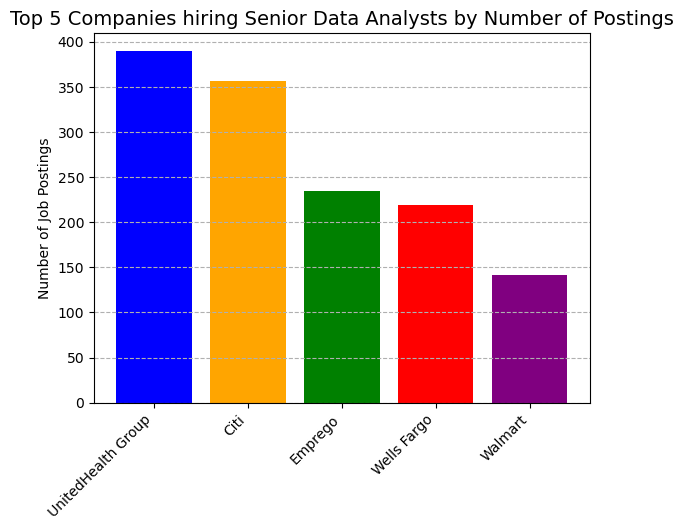

In [88]:
#Course Solution

# Filter for Senior Data Analyst roles
SDA_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()

# Get the top 5 companies by number of postings
location_counts = SDA_df['company_name'].value_counts().head(5)

# Custom colors
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plot the bar chart
plt.bar(location_counts.index, location_counts.values, color=colors)
plt.xlabel('')
plt.ylabel('Number of Job Postings')
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()